In [ ]:
# Data from International Coffee Organization (ICO)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('../data/historical_data/4b - Disappearance.csv', 
                   thousands=',', # to read the comma as thousands separator --> numbers will not be strings
                   )

In [7]:
data.head(7)

,Disappearance (consumption) in selected importing countries,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,In thousand 60-kg bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Calendar years,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,European Union,31882.0,35322.0,35724.0,37759.0,34210.0,36535.0,37635.0,36911.0,37376.0,...,38061.0,37831.0,38053.0,38758.0,39717.0,38207.0,40721.0,39169.0,41342.0,41262.0
5,Austria,1340.0,1302.0,1212.0,1335.0,1086.0,1012.0,1076.0,1087.0,1105.0,...,903.0,1117.0,1269.0,1249.0,1135.0,1136.0,1193.0,1162.0,1172.0,1173.0
6,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,871.0,934.0,915.0,1245.0,1259.0,1074.0,1502.0,1300.0,1365.0,1185.0


In [8]:
# set the 3rd row as the header
data.columns = data.iloc[2,]

In [9]:
# drop first rows 
data = data[5:]

In [10]:
# defining new column names

newcols = ['importing_country']

intcols = [int(col) for col in data.columns[1:]]

for i in intcols:
    newcols.append(i)

data.columns = newcols

In [11]:
# resetting the index after row deletion
data.reset_index(inplace=True)

# dropping the index column
data.drop(columns='index',inplace=True)

In [12]:
# deleting a bunch of useless rows filled with NaN that have been read from the CSV file

for row in range(data.shape[0]):
    
    # some rows are NaN, hence floats, and so the for loop will not iterate through them
    # hence we enclose it in try-except statement, and if there's a float error continue to next iteration
    
    try:
        if 'Total' in data.loc[row, 'importing_country']:
            data.drop(data.index[row-1:], inplace=True)
            break
    except:
        continue

In [13]:
# making the dates the row index and the countires the columns
data = data.T

In [14]:
# resetting the column names

data.rename(columns=data.iloc[0], inplace=True)

data = data[1:]

In [15]:
# we have one or more columns filled only with missing values
print(np.nan in data.columns)
print('')

# finding which column is called NaN:
for i in range(len(data.columns)):
    print(i, data.columns[i])

True

0    Austria
1    Belgium
2    Belgium/Luxembourg
3    Bulgaria
4    Croatia
5    Cyprus
6    Czechia
7    Denmark
8    Estonia
9    Finland
10    France
11    Germany
12    Greece
13    Hungary
14    Ireland
15    Italy
16    Latvia
17    Lithuania
18    Luxembourg
19    Malta
20    Netherlands
21    Poland
22    Portugal
23    Romania
24    Slovakia
25    Slovenia
26    Spain
27    Sweden
28 nan
29 Japan
30 Norway
31 Russian Federation
32 Switzerland
33 Tunisia
34 United Kingdom
35 United States of America


In [16]:
# drop column named NaN (it was an empty space between the countries' names)
data.drop(columns = np.nan, inplace=True)

# eliminating white space for some column names
data.columns = [col.strip() for col in data.columns]

In [17]:
# change column names
cntrs = ['Austria', 'Belgium', 'Belgium/Luxembourg', 'Bulgaria', 'Croatia', 'Cyprus',  'Czechia', 
         'Denmark', 'Estonia', 'Finland', 'France',   'Germany', 'Greece', 'Hungary', 'Ireland',
         'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
         'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan', 'Norway', 'Russia', 'Switzerland', 
         'Tunisia', 'UK', 'USA']

data.columns = cntrs

In [18]:
# all data types are object, they need to be integers
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [19]:
# for missing values in Belgium and Luxembourg, there is a column named 'Belgium/Luxembourg'
check = data[['Belgium','Belgium/Luxembourg','Luxembourg']]
check

,Belgium,Belgium/Luxembourg,Luxembourg
1990,NaN,1124.0,NaN
1991,NaN,708.0,NaN
1992,NaN,696.0,NaN
1993,NaN,789.0,NaN
1994,NaN,958.0,NaN
1995,NaN,1073.0,NaN
1996,NaN,1039.0,NaN
1997,NaN,886.0,NaN
1998,NaN,1309.0,NaN
1999,834.0,NaN,61.0


In [20]:
# take only the rows where there are no Nan under 'Belgium' and 'Luxembourg'
check2 = check.loc[1999:,['Belgium','Luxembourg']]

# total consumption of the two countries
check2['tot'] = check2['Belgium'] + check2['Luxembourg']

# creating a column with the percentage of consumption of Belgium out of the total consumption of both countries
check2['pct_belgium'] = [check2.iloc[row,0]*100/check2.iloc[row,2] for row in range(check2.shape[0])]

# Belgium accounts, on average, for 84% of the total consumption by Luxembourg and Belgium together
# Hence, we feel the NaN in Belgium and Luxembourg with the respective consumption percentage for each 
# year - 84% for Belgium and 16% for Luxembourg
check2['pct_belgium'].mean() # 84%

84.40604823039173

In [21]:
# take all the rows where there are missing values for 'Belgium' and 'Luxembourg'
check3 = check.loc[:1998, ['Belgium','Belgium/Luxembourg','Luxembourg']]
check3

,Belgium,Belgium/Luxembourg,Luxembourg
1990,NaN,1124.0,NaN
1991,NaN,708.0,NaN
1992,NaN,696.0,NaN
1993,NaN,789.0,NaN
1994,NaN,958.0,NaN
1995,NaN,1073.0,NaN
1996,NaN,1039.0,NaN
1997,NaN,886.0,NaN
1998,NaN,1309.0,NaN


In [22]:
# add 84% of the total consumption of both countries to Belgium and the remaining 16% to Luxembourg
for row in range(check3.shape[0]):
    check3.iloc[row, 0] = check3.iloc[row, 1] * 84 / 100
    check3.iloc[row, 2] = check3.iloc[row, 1] * 16 / 100

In [23]:
# paste together again the two columns of Belgium and Luxembourg and drop unnecessary columns
check = pd.concat([check3, check2], axis=0)
check.drop(columns=['Belgium/Luxembourg', 'tot', 'pct_belgium'], inplace=True)

In [24]:
# drop the two countries' columns from the original data frame and re-paste them together after the NA's have
# been filled
data.drop(columns=['Belgium','Belgium/Luxembourg', 'Luxembourg'], inplace=True)

data = pd.concat([check, data], axis=1)

In [25]:
## For EU countries, fill in NA's with the EU countries' average for that particular year
eu = data.loc[:, data.columns[:27]]

for row in range(eu.shape[0]):
    # take the EU average for each row and rounding it
    M = eu.iloc[row,:].mean(skipna=True)
    M = round(M, 2)
    # filling missing values in EU countries with the EU average for that row
    eu.iloc[row, :].fillna(M, axis=0, inplace=True)

In [26]:
# creating a column with EU average
eu['EU'] = eu.apply(lambda x: x.mean(), axis=1)
eu['EU'] = round(eu['EU'], 2)

In [27]:
# looking at non-EU countries
data.loc[:, data.columns[27:]]

,Japan,Norway,Russia,Switzerland,Tunisia,UK,USA
1990,5060.0,727.0,NaN,907.0,101.0,2348.0,18298.0
1991,5809.0,758.0,NaN,949.0,90.0,2342.0,18661.0
1992,5132.0,736.0,1377.0,995.0,111.0,2516.0,18290.0
1993,5740.0,690.0,1795.0,869.0,101.0,2534.0,19217.0
1994,5973.0,800.0,1712.0,944.0,137.0,2640.0,17326.0
1995,6116.0,657.0,1650.0,935.0,137.0,2200.0,17363.0
1996,5838.0,713.0,1063.0,922.0,144.0,2406.0,18059.0
1997,5968.0,675.0,1857.0,712.0,165.0,2441.0,17795.0
1998,6052.0,702.0,1647.0,811.0,147.0,2588.0,18604.0
1999,6273.0,785.0,1352.0,863.0,185.0,2276.0,19359.0


In [28]:
# exclude EU countries
data = data.loc[:, data.columns[27:]]

In [29]:
# merge data and EU countries where NA's were filled
data = pd.concat([eu, data], axis=1)

In [30]:
data.columns

Index(['Belgium', 'Luxembourg', 'Austria', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Malta',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'EU', 'Japan', 'Norway', 'Russia', 'Switzerland',
       'Tunisia', 'UK', 'USA'],
      dtype='object')

In [31]:
# list of 27 colors, as the number of columns in the data set
colors = [f'tab:{color}' for color in ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']]

additional_colors = ['maroon','deepskyblue','steelblue','teal','thistle','darkorchid','mediumpurple','black','darkgreen',
                     'burlywood','deeppink','crimson','olive','dodgerblue','lawngreen','peru','gold','darkorange',
                     'forestgreen','lightcoral','darkcyan','orchid','saddlebrown','darksalmon','midnightblue']

for color in colors:
    additional_colors.append(color)

additional_colors

['maroon',
 'deepskyblue',
 'steelblue',
 'teal',
 'thistle',
 'darkorchid',
 'mediumpurple',
 'black',
 'darkgreen',
 'burlywood',
 'deeppink',
 'crimson',
 'olive',
 'dodgerblue',
 'lawngreen',
 'peru',
 'gold',
 'darkorange',
 'forestgreen',
 'lightcoral',
 'darkcyan',
 'orchid',
 'saddlebrown',
 'darksalmon',
 'midnightblue',
 'tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

In [32]:
sorted(list(data.drop(columns=['USA','UK','Tunisia','Norway','Russia','Switzerland','Japan']).columns))

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'EU',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']

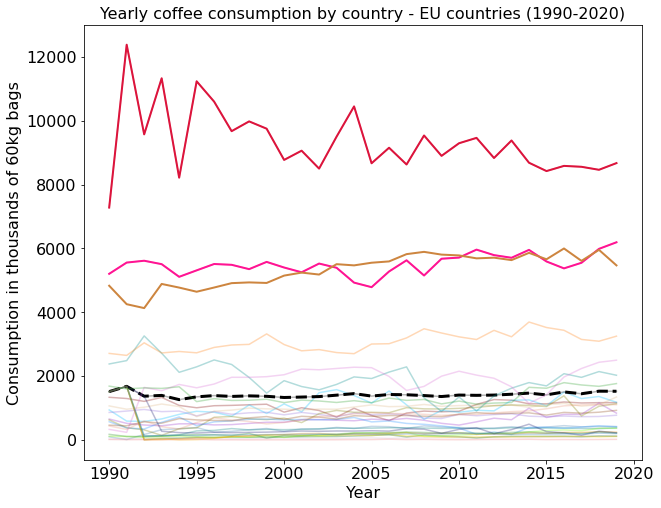

In [40]:
## plotting historical yearly coffee prices per country - EU countries
plt.figure(figsize=(10,8))

for col,color in zip(sorted(list(data.drop(columns=['USA','UK','Tunisia','Norway','Russia','Switzerland','Japan']).columns)), additional_colors):
    if color == 'black':
        data[col].plot(color=color, linewidth=3, style='--')
        plt.savefig('../images/plots/historical_yearly_consumption_by_EU_countries.jpeg')
    if color == 'deeppink':
        data[col].plot(color=color, linewidth=2)
    if color == 'crimson':
        data[col].plot(color=color, linewidth=2)
    if color == 'peru':
        data[col].plot(color=color, linewidth=2)
    else:
        data[col].plot(color=color, alpha=0.3);
        #plt.legend(bbox_to_anchor = (1, 1), prop={'size': 14});
        plt.ylabel('Consumption in thousands of 60kg bags', fontsize=16)
        plt.xlabel('Year', fontsize=16)
        plt.title('Yearly coffee consumption by country - EU countries (1990-2020)', fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.savefig('../images/plots/historical_yearly_consumption_by_EU_countries.jpeg')

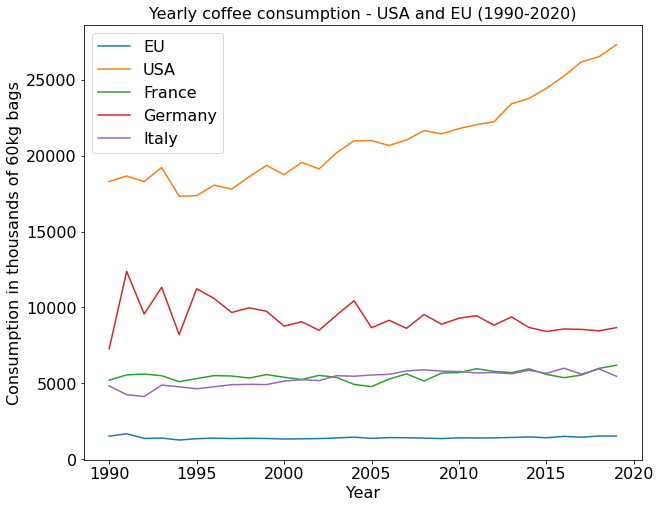

In [43]:
## plotting historical yearly coffee prices per country - selected world countries

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

for col,color in zip(data[['EU','USA', 'France', 'Germany', 'Italy']].columns, colors):
        data[col].plot(color=color);
        plt.legend(prop = {'size':16});
        plt.ylabel('Consumption in thousands of 60kg bags', fontsize=16)
        plt.xlabel('Year', fontsize=16)
        plt.title('Yearly coffee consumption - USA and EU (1990-2020)', fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.savefig('../images/plots/historical_yearly_consumption_USA_EU.jpeg')

---

In [30]:
data.head()

,Belgium,Luxembourg,Austria,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Spain,Sweden,EU,Japan,Norway,Russia,Switzerland,Tunisia,UK,USA
1990,944.16,179.84,1340.0,102.0,1518.19,31.0,659.0,865.0,1518.19,1070.0,...,2714.0,1689.0,1518.19,5060.0,727.0,NaN,907.0,101.0,2348.0,18298.0
1991,594.72,113.28,1302.0,17.0,1682.00,45.0,525.0,909.0,1682.00,966.0,...,2651.0,1604.0,1682.00,5809.0,758.0,NaN,949.0,90.0,2342.0,18661.0
1992,584.64,111.36,1212.0,175.0,135.00,39.0,472.0,959.0,13.00,1030.0,...,3045.0,1634.0,1373.92,5132.0,736.0,1377.0,995.0,111.0,2516.0,18290.0
1993,662.76,126.24,1335.0,327.0,132.00,78.0,448.0,891.0,44.00,1129.0,...,2728.0,1618.0,1398.52,5740.0,690.0,1795.0,869.0,101.0,2534.0,19217.0
1994,804.72,153.28,1086.0,353.0,164.00,45.0,509.0,908.0,63.00,1050.0,...,2774.0,1669.0,1267.04,5973.0,800.0,1712.0,944.0,137.0,2640.0,17326.0


In [197]:
data.to_csv('../data/yearly_consumption_international.csv')

In [31]:
data.shape

(30, 35)

In [32]:
df = data[['France','Germany','USA']]

In [33]:
df

,France,Germany,USA
1990,5205.0,7279.0,18298.0
1991,5557.0,12377.0,18661.0
1992,5614.0,9570.0,18290.0
1993,5507.0,11325.0,19217.0
1994,5111.0,8214.0,17326.0
1995,5313.0,11231.0,17363.0
1996,5512.0,10594.0,18059.0
1997,5487.0,9670.0,17795.0
1998,5351.0,9976.0,18604.0
1999,5578.0,9748.0,19359.0


In [41]:
m = pd.read_csv('../data/monthly_historical.csv')
m.head()

,date,ICO composite indicator,Colombian\n Milds,Other Milds,Brazilian\n Naturals,Robustas
0,1990-01,62.75,82.07,76.02,70.36,49.47
1,1990-02,67.01,91.55,83.95,77.59,50.06
2,1990-03,75.25,103.24,94.73,86.17,55.76
3,1990-04,75.34,101.79,94.71,87.45,55.95
4,1990-05,73.30,99.14,92.97,86.31,53.62


In [42]:
m['date'] = pd.to_datetime(m['date'])

In [43]:
m.set_index('date', inplace=True)

In [46]:
m_price = m.resample('Y')[['ICO composite indicator']].mean()

In [52]:
m_price.index = pd.DatetimeIndex(m_price.index).year

In [55]:
price_cons = pd.concat([df, m_price], axis=1)

In [57]:
price_cons['avg_cons'] = (price_cons['France'] + price_cons['Germany'] + price_cons['USA']) / 3

In [76]:
price_cons['avg_cons_s'] = price_cons['avg_cons'] / 1000

In [60]:
import seaborn as sns

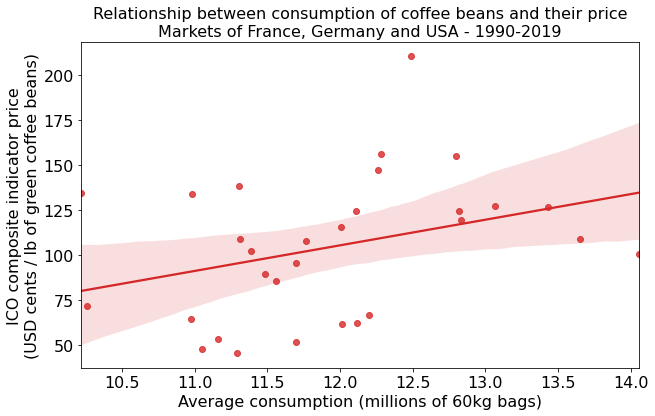

In [194]:
plt.figure(figsize=(10,6))
sns.regplot(data=price_cons, x='avg_cons_s', y='ICO composite indicator', color='tab:red');
plt.title('Relationship between consumption of coffee beans and their price\nMarkets of France, Germany and USA - 1990-2019', fontsize=16)
plt.xlabel('Average consumption (millions of 60kg bags)', fontsize=16)
plt.ylabel('ICO composite indicator price\n(USD cents / lb of green coffee beans)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('../images/plots/yearly_prices_consumption.jpeg');

In [80]:
from scipy.stats import pearsonr

In [81]:
corr, _ = pearsonr(price_cons['avg_cons'], price_cons['ICO composite indicator'])

In [82]:
corr

0.33913086156536376

In [95]:
price_cons.head()

,France,Germany,USA,ICO composite indicator,avg_cons,avg_cons_s
1990,5205.0,7279.0,18298.0,71.532500,10260.666667,10.260667
1991,5557.0,12377.0,18661.0,66.800833,12198.333333,12.198333
1992,5614.0,9570.0,18290.0,53.351667,11158.000000,11.158000
1993,5507.0,11325.0,19217.0,61.630833,12016.333333,12.016333
1994,5111.0,8214.0,17326.0,134.452500,10217.000000,10.217000


In [94]:
from sklearn.model_selection import train_test_split

In [152]:
dat = price_cons[['ICO composite indicator','avg_cons_s']]

In [153]:
dat.index = pd.DatetimeIndex(dat.index)

In [185]:
y_train, y_test = train_test_split(dat['ICO composite indicator'], test_size=0.1, shuffle=False, random_state=123)

In [186]:
y_train.shape

(27,)

In [187]:
y_test.shape

(3,)

In [188]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm

In [189]:
exog = sm.tools.tools.add_constant(dat.loc[y_train.index, 'avg_cons_s'])

In [190]:
model = sm.tsa.statespace.sarimax.SARIMAX(endog = y_train.asfreq('D'), exog = exog.asfreq('D'), order = (2,2,0))

In [191]:
res = model.fit(disp=False)

C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Yair\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Yair\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\Yair\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Li

In [192]:
print(res.summary())

                                  SARIMAX Results                                  
Dep. Variable:     ICO composite indicator   No. Observations:                    1
Model:                    SARIMAX(2, 2, 0)   Log Likelihood                   0.000
Date:                     Thu, 12 Aug 2021   AIC                             10.000
Time:                             15:43:00   BIC                                nan
Sample:                         01-01-1970   HQIC                               nan
                              - 01-01-1970                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0        nan        nan        nan         nan         nan
avg_cons_s          0        nan        nan        nan         nan         nan
ar.L1       

C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3098: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Early subset of data for variable %d'
C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3103: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Later subset of data for variable %d'
C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:469: RuntimeWarning: Mean of empty slice.
 

In [92]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [93]:
# multiplicative seasonal component
result_mul = seasonal_decompose(price_cons['ICO composite indicator'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:


# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [88]:
# SARIMAX Model
sxmodel = pm.auto_arima(price_cons[['ICO composite indicator']], exogenous=price_cons[['avg_cons_s']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

C:\Users\Yair\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=292.551, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=289.790, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=290.558, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=277.134, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=278.987, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=278.732, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=275.155, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=287.799, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=277.019, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=276.801, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

B

In [89]:
sxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -133.578
Date:                Thu, 12 Aug 2021   AIC                            275.155
Time:                        14:56:50   BIC                            280.484
Sample:                    01-01-1970   HQIC                           276.784
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
avg_cons_s    -8.0424      4.646     -1.731      0.083     -17.149       1.064
ar.L1         -0.6258      0.147     -4.261      0.000      -0.914      -0.338
ar.L2         -0.6312      0.186     -3.393      0.001      -0.996      -0.267
sigma2       781.7969    265.956      2.940      0.003     260.533    1303.061
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.76   Prob(JB):                         0.43
Heteroskedasticity (H):               1.17   Skew:                            -0.60
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(price_cons.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

AttributeError: 'Series' object has no attribute 'value'

In [ ]:
# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()